In [25]:
import pandas as pd

In [2]:
data = pd.read_csv('Data.csv')

In [3]:
data.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Spatial Aggregation

In [6]:
#Question1 --------------->>>>>
avg_pm25 = data.groupby("state")["PM2.5"].mean()
highest_avg_state = avg_pm25.idxmax()
highest_avg_value = avg_pm25.max()
print(f"State with hightest average PM2.5 is {highest_avg_state} with {highest_avg_value}  µg/m³")

State with hightest average PM2.5 is Delhi with 104.1009176780069  µg/m³


In [9]:
#Question2 ------------->>>
# Convert Timestamp column to datetime
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%Y-%m-%d")
data["Year"] = data["Timestamp"].dt.year

hazard_2023 = data[(data["Year"] == 2023) & (data["PM2.5"] > 300)]
hazardous_state = hazard_2023["state"].value_counts().idxmax()
hazardous_days = hazard_2023["state"].value_counts().max()
print(f"State with most hazardous PM2.5 days in 2023: {hazardous_state} ({hazardous_days} days)")

State with most hazardous PM2.5 days in 2023: Delhi (470 days)


In [10]:
#Question3------------------>>>>>
variability_2023 = data[data["Year"] == 2023].groupby("state")["PM2.5"].std()
highest_variability_state = variability_2023.idxmax()
highest_variability_value = variability_2023.max()

print(f"State with highest variability in PM2.5 in 2023: {highest_variability_state} (Std Dev: {highest_variability_value:.2f})")

State with highest variability in PM2.5 in 2023: Delhi (Std Dev: 82.80)


In [11]:
#Question4----------------->>>>>>
covid_period = data[(data["Year"] >= 2020) & (data["Year"] <= 2021)]
lowest_pm25_covid_state = covid_period.groupby("state")["PM2.5"].mean().idxmin()
lowest_pm25_covid_value = covid_period.groupby("state")["PM2.5"].mean().min()

print(f"State with lowest average PM2.5 during Covid (2020-2021): {lowest_pm25_covid_state} ({lowest_pm25_covid_value:.2f} µg/m³)")

State with lowest average PM2.5 during Covid (2020-2021): Mizoram (14.32 µg/m³)


Temporal Aggregation

In [14]:
#Question1--------->>
# 1. Station with the highest PM2.5 value in August 2020 -->
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%Y-%m-%d")
data["Month"] = data["Timestamp"].dt.month

aug_2020 = data[(data["Year"] == 2020) & (data["Month"] == 8)]
highest_station_aug_2020 = aug_2020.loc[aug_2020["PM2.5"].idxmax(), "station"]
highest_value_aug_2020 = aug_2020["PM2.5"].max()

print(f"Station with highest PM2.5 in Aug 2020: {highest_station_aug_2020} ({highest_value_aug_2020:.2f} µg/m³)")

Station with highest PM2.5 in Aug 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB (805.51 µg/m³)


In [15]:
#Question2----------->>
# 2. Seasonal average PM2.5 for 2018 at specific stations
season_def = {
    "Winter": [12, 1, 2],
    "Summer": [3, 4, 5],
    "Monsoon": [6, 7, 8, 9]
}

stations = ["Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]
seasonal_avg_2018 = {}

for season, months in season_def.items():
    seasonal_data = data[(data["Year"] == 2018) & (data["Month"].isin(months)) & (data["station"].isin(stations))]
    seasonal_avg_2018[season] = seasonal_data["PM2.5"].mean()

highest_pollution_season = max(seasonal_avg_2018, key=seasonal_avg_2018.get)

print(f"Season with highest PM2.5 in 2018 at given stations: {highest_pollution_season}")

Season with highest PM2.5 in 2018 at given stations: Winter


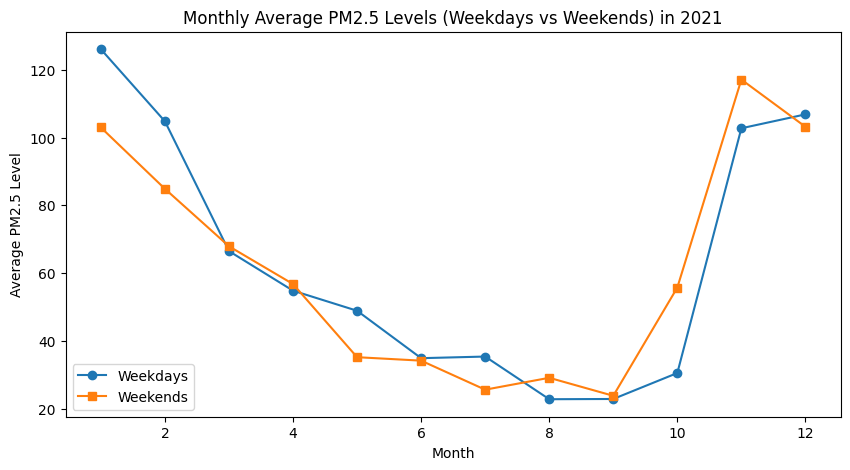

In [19]:
#Question3------------->>
import matplotlib.pyplot as plt
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%Y-%m-%d")
data["Day"] = data["Timestamp"].dt.day
data_2021 = data[data["Year"] == 2021]
weekday_avg = data_2021[data_2021["Day"] < 5].groupby("Month")["PM2.5"].mean()
weekend_avg = data_2021[data_2021["Day"] >= 5].groupby("Month")["PM2.5"].mean()

plt.figure(figsize=(10,5))
plt.plot(weekday_avg.index, weekday_avg.values, label='Weekdays', marker='o')
plt.plot(weekend_avg.index, weekend_avg.values, label='Weekends', marker='s')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 Level')
plt.title('Monthly Average PM2.5 Levels (Weekdays vs Weekends) in 2021')
plt.legend()
plt.show()

Spatial Temporal Aggregation

In [22]:
#Question1--------------------->>>>>>>>>

#Percentage change in PM2.5 levels between monsoon and summer in 2022
monsoon_2022 = data[(data["Year"] == 2022) & (data["Month"].isin(season_def["Monsoon"]))].groupby("state")["PM2.5"].mean()
summer_2022 = data[(data["Year"] == 2022) & (data["Month"].isin(season_def["Summer"]))].groupby("state")["PM2.5"].mean()
percentage_change = ((monsoon_2022 - summer_2022) / summer_2022) * 100
state_max_change = percentage_change.idxmax()
max_change_value = percentage_change.max()

print(f"State with most change in PM2.5 levels from Summer to Monsoon in 2022: {state_max_change} ({max_change_value:.2f}%)")

State with most change in PM2.5 levels from Summer to Monsoon in 2022: Jammu and Kashmir (-0.00%)


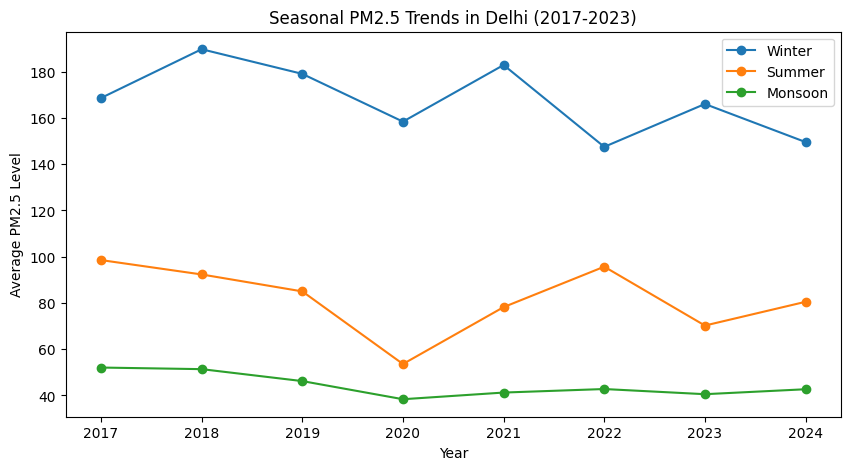

In [23]:
#Question2----------------->>>>>>>
#Seasonal PM2.5 trends for Delhi from 2017-2023
delhi_data = data[data["state"] == "Delhi"]
seasonal_pm25 = {season: delhi_data[delhi_data["Month"].isin(months)].groupby("Year")["PM2.5"].mean() for season, months in season_def.items()}

plt.figure(figsize=(10,5))
for season, values in seasonal_pm25.items():
    plt.plot(values.index, values.values, label=season, marker='o')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.title('Seasonal PM2.5 Trends in Delhi (2017-2023)')
plt.legend()
plt.show()


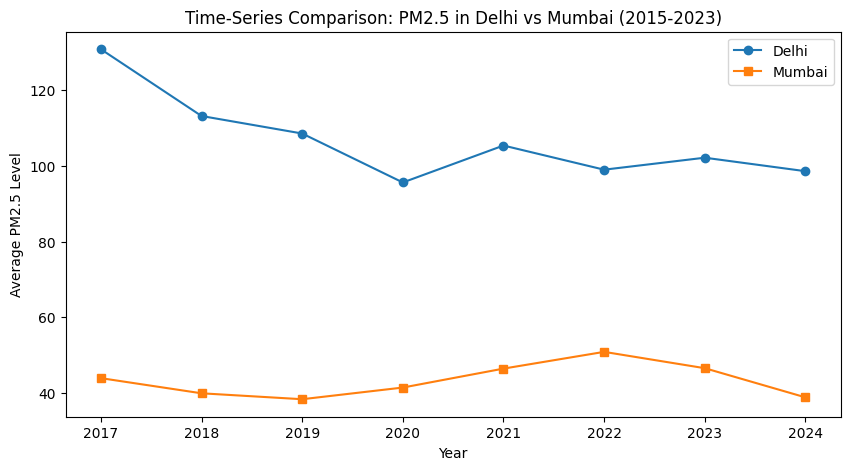

In [24]:
#Question3 ------------------------>>>
#Time-series comparison of Delhi and Mumbai PM2.5 levels
delhi_pm25 = data[data["state"] == "Delhi"].groupby("Year")["PM2.5"].mean()
mumbai_pm25 = data[data["state"] == "Maharashtra"].groupby("Year")["PM2.5"].mean()
plt.figure(figsize=(10,5))
plt.plot(delhi_pm25.index, delhi_pm25.values, label='Delhi', marker='o')
plt.plot(mumbai_pm25.index, mumbai_pm25.values, label='Mumbai', marker='s')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.title('Time-Series Comparison: PM2.5 in Delhi vs Mumbai (2015-2023)')
plt.legend()
plt.show()